<a href="https://colab.research.google.com/github/DarkLord-13/Machine-Learning-01/blob/main/EDA(taxi_trip_data)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing the dependencies
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [31]:
dataset = pd.read_csv('/content/drive/MyDrive/motorq/taxi_trip_data_clean_1_6months.csv')

In [3]:
dataset.head()

,vendor_id,pickup_datetime,dropoff_datetime,store_and_fwd_flag,ratecode_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,total_amount,payment_type,trip_type,congestion_surcharge
0,2.0,2018-12-21 15:17:29,2018-12-21 15:18:57,N,1.0,264,264,5.0,0.00,4.30,2.0,1.0,NaN
1,2.0,2019-01-01 00:10:16,2019-01-01 00:16:32,N,1.0,97,49,2.0,0.86,7.30,2.0,1.0,NaN
2,2.0,2019-01-01 00:27:11,2019-01-01 00:31:38,N,1.0,49,189,2.0,0.66,5.80,1.0,1.0,NaN
3,2.0,2019-01-01 00:46:20,2019-01-01 01:04:54,N,1.0,189,17,2.0,2.68,19.71,1.0,1.0,NaN
4,2.0,2019-01-01 00:19:06,2019-01-01 00:39:43,N,1.0,82,258,1.0,4.53,19.30,2.0,1.0,NaN


Number of rows is a lot, indication a good quantity dataset

In [4]:
dataset.shape

(3298115, 13)

In [7]:
dataset.describe()

,vendor_id,ratecode_id,pickup_location_id,dropoff_location_id,passenger_count,trip_distance,total_amount,payment_type,trip_type,congestion_surcharge
count,3.298115e+06,3.298115e+06,3.298115e+06,3.298115e+06,3.298115e+06,3.298115e+06,3.298115e+06,3.298115e+06,3.298115e+06,2.751735e+06
mean,1.845088e+00,1.246350e+00,1.088997e+02,1.291907e+02,1.310473e+00,3.248475e+00,1.627953e+01,1.422561e+00,1.059261e+00,3.684141e-01
std,3.618212e-01,9.856760e-01,7.224722e+01,7.661441e+01,9.733951e-01,3.944238e+00,1.392871e+01,5.174271e-01,2.361134e-01,9.363113e-01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-8.903000e+02,1.000000e+00,1.000000e+00,-2.750000e+00
25%,2.000000e+00,1.000000e+00,5.200000e+01,6.500000e+01,1.000000e+00,1.050000e+00,8.300000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,2.000000e+00,1.000000e+00,8.200000e+01,1.290000e+02,1.000000e+00,1.900000e+00,1.230000e+01,1.000000e+00,1.000000e+00,0.000000e+00
75%,2.000000e+00,1.000000e+00,1.660000e+02,1.930000e+02,1.000000e+00,3.800000e+00,1.930000e+01,2.000000e+00,1.000000e+00,0.000000e+00
max,2.000000e+00,9.900000e+01,2.650000e+02,2.650000e+02,9.000000e+00,6.666000e+02,4.012300e+03,5.000000e+00,2.000000e+00,2.750000e+00


congestion_surcharge seems to have very odd values as it's min=-2.75 and max=2.75.

It has about 546380 values missing.

It has a very low average.

As you can see congestional_charge has 16.5% of its data missing

It is advisable to delete the column if more than 15% of its dataset is missing, but we will handle the missing values

# Checking for missing values

In [5]:
dataset.isnull().sum()

vendor_id                    0
pickup_datetime              0
dropoff_datetime             0
store_and_fwd_flag           0
ratecode_id                  0
pickup_location_id           0
dropoff_location_id          0
passenger_count              0
trip_distance                0
total_amount                 0
payment_type                 0
trip_type                    0
congestion_surcharge    546380
dtype: int64

In [6]:
(546380/3298115)*100

16.56643264410125

As you can see congestional_charge has 16.5% of its data missing

It is advisable to delete the column if more than 15% of its dataset is missing, but we will handle the missing values

1. Delete the rows if the dataset is huge

2. Replace the missing values with null values as its a numeric data

In [8]:
dataset['congestion_surcharge'].fillna('congestion_surcharge', inplace=True)

In [9]:
dataset.isnull().sum()

vendor_id               0
pickup_datetime         0
dropoff_datetime        0
store_and_fwd_flag      0
ratecode_id             0
pickup_location_id      0
dropoff_location_id     0
passenger_count         0
trip_distance           0
total_amount            0
payment_type            0
trip_type               0
congestion_surcharge    0
dtype: int64

# Encoding

Every other column is numerically encoded except Store_and_fwd_flag

0 -> NO

1 -> YES

In [32]:
dataset = dataset.replace({'store_and_fwd_flag':{'N':0, 'Y':1}})

0    3290498
1       7617
Name: store_and_fwd_flag, dtype: int64

In [41]:
dataset['store_and_fwd_flag'].value_counts()

0    3290498
1       7617
Name: store_and_fwd_flag, dtype: int64

In [39]:
print((7617/3290498)*100,"%")

0.23148471751084487 %


As you can see only 0.23% of the total drivers can't connect to the server and have to store and forward the data, whereas the rest are simply connected and can share data in real time.

If we will be making a model for this, it's highly imbalanced and we will have to perform data balancing techniques such as:

1. selecting equal number of rows for both but making sure that the selected dataset closely represents the complete dataset.

# Visualization

You can see below that for 1 passenger the total_amount is the maximum, passenger count has an inversely proportional relation to the total amount paid.

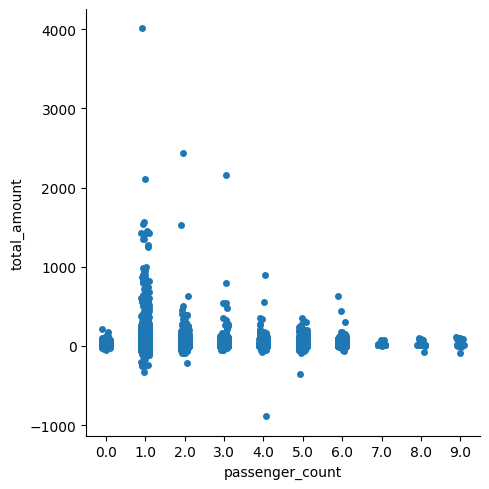

In [16]:
sns.catplot(data=dataset, x='passenger_count', y='total_amount')

<ipython-input-21-cbede200b14c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['passenger_count'])


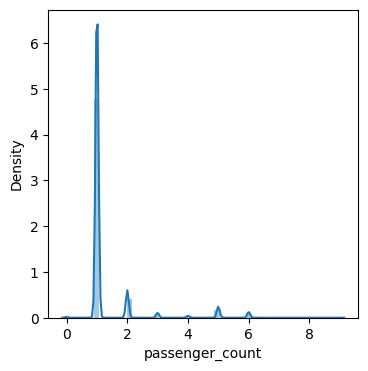

In [21]:
plt.figure(figsize=(4,4))
sns.distplot(dataset['passenger_count'])
plt.show()

<ipython-input-26-cfa8426082b1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['trip_distance'])


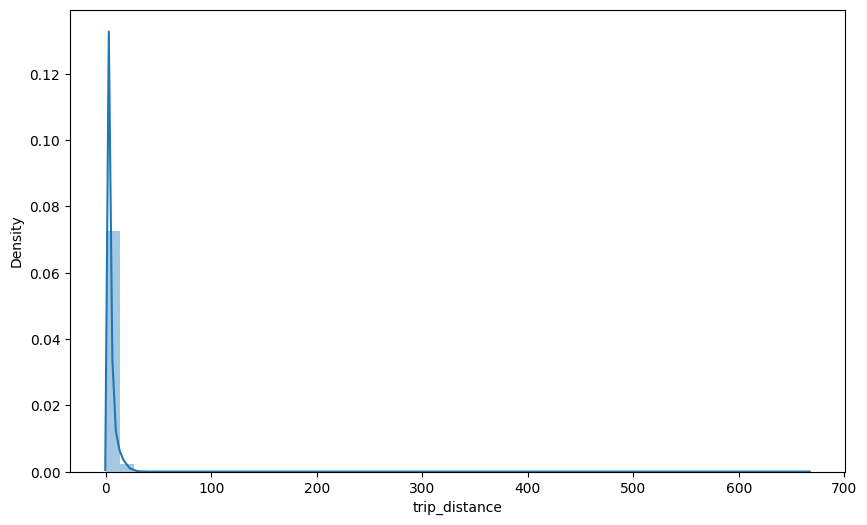

In [26]:
plt.figure(figsize=(10,6))
sns.distplot(dataset['trip_distance'])
plt.show()

1. total_amount and trip_distance are highly correlated positively, i.e., if trip_distance increases then total_amount also increases and vice-versa.

  the driver should always look for longer fairs.

Other's are not affecting each other a lot, a lot of the parameters barely affect each other and does not change the outcome.

for example: passenger_count and payment type has no correlation, therefore the driver should not be affected by how many customers should he take aboard for a specific type of payment mode.

<ipython-input-23-f2fa2b97f51b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dataset.corr()


                     vendor_id  ratecode_id  pickup_location_id  \
vendor_id             1.000000     0.066080           -0.000548   
ratecode_id           0.066080     1.000000            0.071728   
pickup_location_id   -0.000548     0.071728            1.000000   
dropoff_location_id  -0.001071     0.023256            0.155501   
passenger_count       0.072869    -0.054790            0.005486   
trip_distance         0.015814     0.270956            0.069630   
total_amount          0.005822     0.222109            0.062026   
payment_type         -0.040094    -0.105623           -0.023563   
trip_type             0.067528     0.930556            0.064817   

                     dropoff_location_id  passenger_count  trip_distance  \
vendor_id                      -0.001071         0.072869       0.015814   
ratecode_id                     0.023256        -0.054790       0.270956   
pickup_location_id              0.155501         0.005486       0.069630   
dropoff_location_id      

<Axes: >

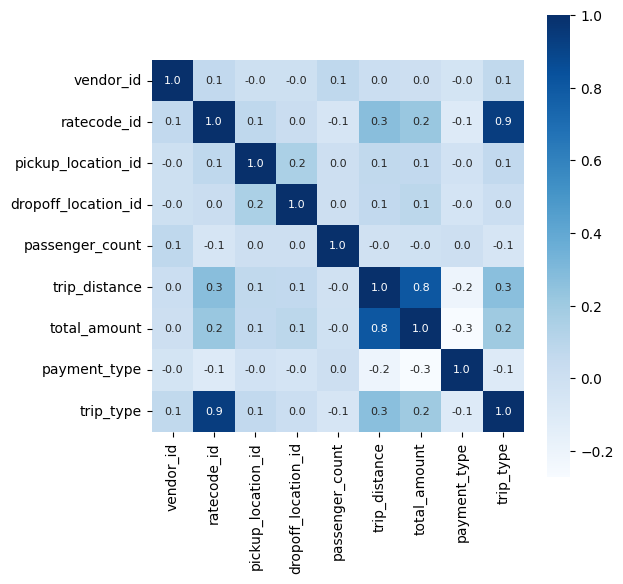

In [23]:
corr = dataset.corr()
print(corr)


plt.figure(figsize=(6,6))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Majority of the passengers travel in strength 1, of which most of them got the cab through street hail, and only a few got it through the dispatch system.

We can infer that it is more profitable for the cab to keep moving rather than to wait at one point for the customer to come.

<Axes: xlabel='passenger_count', ylabel='count'>

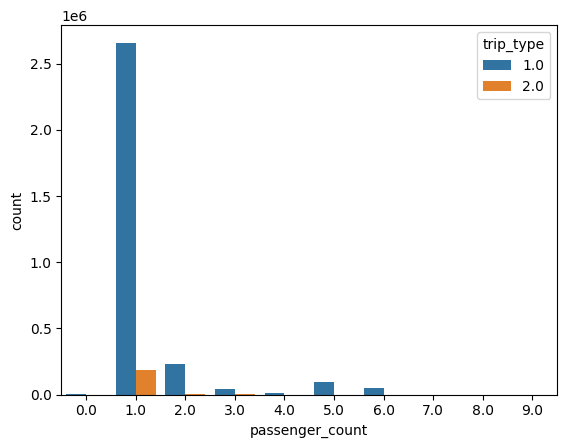

In [20]:
sns.countplot(x='passenger_count', hue='trip_type', data=dataset)

Majority of them end up paying in credit card or cash

Other modes of payment are not so preferred

People who book a moving on the road end up paying in mostly cash or credit card.

CAB DRIVERS must be ready with change and equipment to accept credit card.


<Axes: xlabel='payment_type', ylabel='count'>

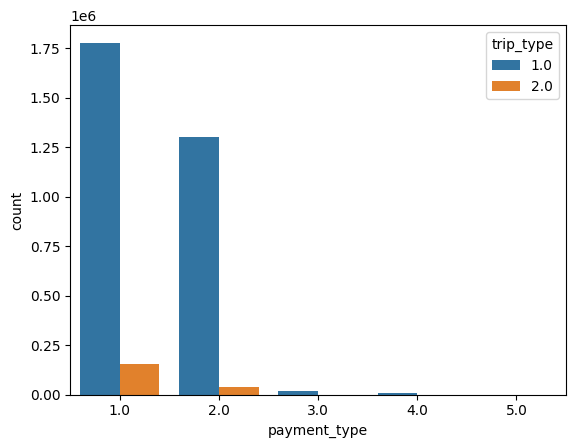

In [24]:
sns.countplot(x='payment_type', hue='trip_type', data=dataset)

Whether be that for vendor 1 or vendor 2, most of the cars are server connected.

<Axes: xlabel='vendor_id', ylabel='count'>

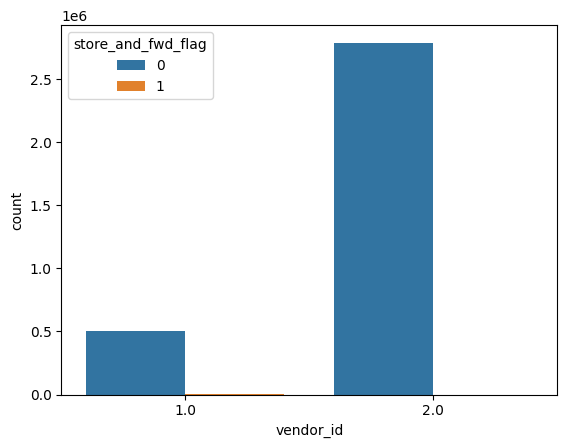

In [42]:
sns.countplot(x='vendor_id', hue='store_and_fwd_flag', data=dataset)

1.

In [45]:
column_name = 'pickup_datetime'
column_data_type = dataset[column_name].dtypes

print(f"The data type of column '{column_name}' is: {column_data_type}")

The data type of column 'pickup_datetime' is: object


Converting both the columns to datetime

In [46]:
dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'])
dataset['dropoff_datetime'] = pd.to_datetime(dataset['dropoff_datetime'])

In [47]:
column_name = 'pickup_datetime'
column_data_type = dataset[column_name].dtypes

print(f"The data type of column '{column_name}' is: {column_data_type}")

The data type of column 'pickup_datetime' is: datetime64[ns]


In [48]:
dataset['trip_duration'] = dataset['dropoff_datetime'] - dataset['pickup_datetime']

total_trip_duration = dataset['trip_duration'].sum()
average_trip_duration = dataset['trip_duration'].mean()

print(f"Total trip duration: {total_trip_duration}")
print(f"Average trip duration: {average_trip_duration}")

Total trip duration: 49532 days 12:38:13
Average trip duration: 0 days 00:21:37.592804677


In [50]:
total_trip_duration = dataset['trip_distance'].sum()
average_trip_duration = dataset['trip_distance'].mean()

print(f"Total trip_distance: {total_trip_duration} miles")
print(f"Average trip_distance: {average_trip_duration} miles")

Total trip_distance: 10713842.949999996 miles
Average trip_distance: 3.2484746438495917 miles


In [51]:
total_trip_duration = dataset['total_amount'].sum()
average_trip_duration = dataset['total_amount'].mean()

print(f"Total total_amount: {total_trip_duration}")
print(f"Average total_amount: {average_trip_duration}")

Total total_amount: 53691751.73000004
Average total_amount: 16.279526860039763


# 2.

The code illustrates patterns in trip counts based on the combination of the day of the week (e.g., Monday, Tuesday, etc.) and the hour of the day (0 to 23).

Each cell in the heatmap represents a specific day of the week and hour of the day combination, and the color of the cell indicates the number of trips recorded for that combination. Darker colors represent higher trip counts, while lighter colors represent lower trip counts.

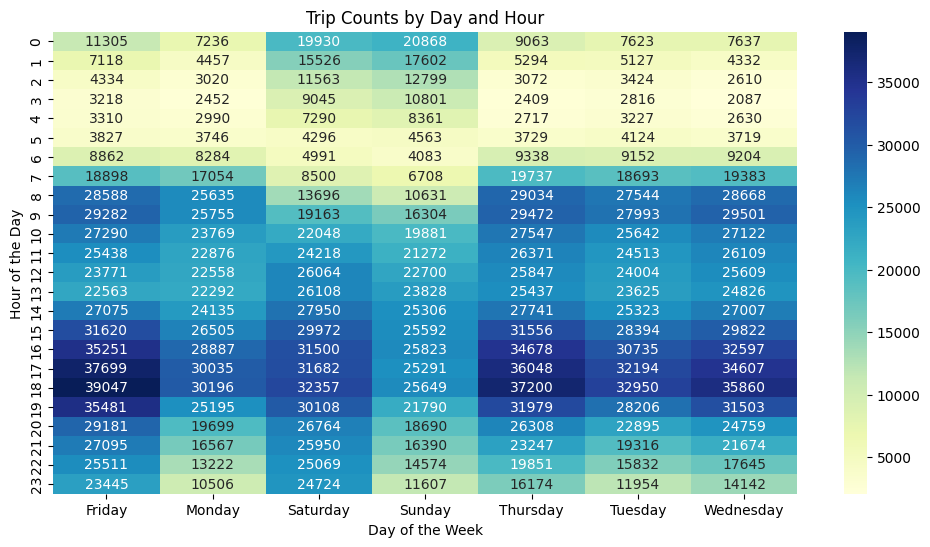

In [54]:
df = dataset

df['pickup_day'] = df['pickup_datetime'].dt.day_name()
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Group data by day of the week and hour of the day, and count trips
grouped = df.groupby(['pickup_day', 'pickup_hour'])['vendor_id'].count().reset_index()

pivot_table = grouped.pivot(index='pickup_hour', columns='pickup_day', values='vendor_id')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Trip Counts by Day and Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()


Inferences:

1. Thursday and Friday evening are the busiest with Wednesday also coming close.

2. Late night and early morning are the least busy hours.

3. Saturday and Sunday have relatively less customers owing to holiday.

For Total amount

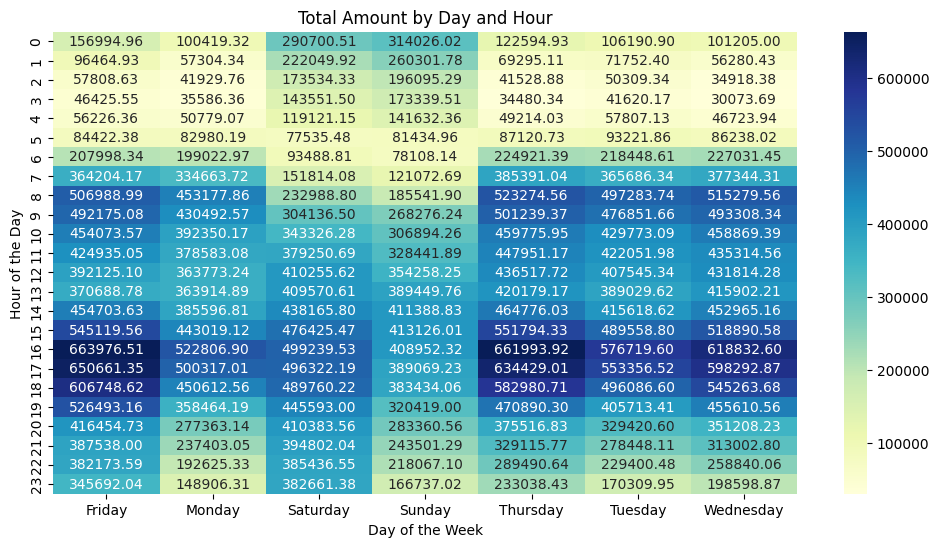

In [56]:
grouped = df.groupby(['pickup_day', 'pickup_hour'])['total_amount'].sum().reset_index()

pivot_table = grouped.pivot(index='pickup_hour', columns='pickup_day', values='total_amount')

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='.2f')
plt.title('Total Amount by Day and Hour')
plt.xlabel('Day of the Week')
plt.ylabel('Hour of the Day')
plt.show()


The inferences are same as above, as total amount and total distance are directly correlated.

# 3.

Display top 10 days with highest average trip distance in miles

i. Use pickup datetime as ref.

In [58]:
# Extract the day from 'pickup_datetime'
df['pickup_day'] = df['pickup_datetime'].dt.date

# Group data by day, calculate average trip distance, and sort
average_distance_per_day = df.groupby('pickup_day')['trip_distance'].mean().reset_index()
top_10_days = average_distance_per_day.nlargest(10, 'trip_distance')

# Display the top 10 days with highest average trip distance
print(top_10_days)


    pickup_day  trip_distance
2   2009-01-01       3.792979
47  2019-02-05       3.787502
61  2019-02-19       3.772923
46  2019-02-04       3.724721
89  2019-03-19       3.712641
84  2019-03-14       3.690773
90  2019-03-20       3.649291
39  2019-01-28       3.640424
95  2019-03-25       3.636162
19  2019-01-08       3.634827


Display top 5 week with highest trip count

i. No restriction on week boundaries – just explain the boundary you
choose

In [62]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Extract the week number and year from 'pickup_datetime'
df['pickup_week'] = df['pickup_datetime'].dt.strftime('%Y-%U')

# Group data by week, calculate trip count, and sort
trip_count_per_week = df.groupby('pickup_week')['vendor_id'].count().reset_index()
top_5_weeks = trip_count_per_week.nlargest(5, 'vendor_id')

# Define a function to calculate the date range of a week
def get_week_date_range(year, week_number):
    first_day = pd.to_datetime(f'{year}-01-01') + pd.DateOffset(days=(week_number - 1) * 7 - pd.to_datetime(f'{year}-01-01').weekday())
    last_day = first_day + pd.DateOffset(days=6)
    return first_day, last_day

# Print the top 5 weeks with highest trip count and their date ranges
for index, row in top_5_weeks.iterrows():
    year, week = map(int, row['pickup_week'].split('-'))
    start_date, end_date = get_week_date_range(year, week)
    print(f"Week: {year}-W{week:02}, Trip Count: {row['vendor_id']}, Date Range: {start_date.strftime('%Y-%m-%d')} - {end_date.strftime('%Y-%m-%d')}")


Week: 2019-W04, Trip Count: 150674, Date Range: 2019-01-21 - 2019-01-27
Week: 2019-W05, Trip Count: 150321, Date Range: 2019-01-28 - 2019-02-03
Week: 2019-W01, Trip Count: 146941, Date Range: 2018-12-31 - 2019-01-06
Week: 2019-W02, Trip Count: 145775, Date Range: 2019-01-07 - 2019-01-13
Week: 2019-W06, Trip Count: 142882, Date Range: 2019-02-04 - 2019-02-10


Monthly total trip ratio vendors

In [ ]:

# Extract month and count trips for each vendor-month combination
df['pickup_month'] = df['pickup_datetime'].dt.strftime('%b %Y')
vendor_trip_counts = df.groupby(['pickup_month', 'vendor_id'])['vendor_id'].count().unstack(fill_value=0)

# Calculate the total trips for each month
vendor_trip_counts['Total'] = vendor_trip_counts.sum(axis=1)

# Calculate the percentage of trips for each vendor
vendor_trip_counts['% of trips - Vendor 1'] = (vendor_trip_counts[1] / vendor_trip_counts['Total']) * 100
vendor_trip_counts['% of trips - Vendor 2'] = (vendor_trip_counts[2] / vendor_trip_counts['Total']) * 100




In [64]:
print(vendor_trip_counts.head())

vendor_id       1.0     2.0   Total  % of trips - Vendor 1  \
pickup_month                                                 
Apr 2019      83592  430795  514387              16.250799   
Dec 2008          0      15      15               0.000000   
Dec 2018          0      66      66               0.000000   
Feb 2019      84150  491522  575672              14.617699   
Jan 2009          0      96      96               0.000000   

vendor_id     % of trips - Vendor 2  
pickup_month                         
Apr 2019                  83.749201  
Dec 2008                 100.000000  
Dec 2018                 100.000000  
Feb 2019                  85.382301  
Jan 2009                 100.000000  


# 4.

Explicate correlation between

a. Trip Distance vs Duration (min)

correlation_distance_duration calculates the correlation coefficient between 'Trip_distance' and 'Trip_duration'.

correlation_distance_amount calculates the correlation coefficient between 'Trip_distance' and 'Total_amount'.

correlation_duration_amount calculates the correlation coefficient between 'Trip_duration' and 'Total_amount'.
The correlation coefficient values range from -1 to 1, where:


A positive value closer to 1 indicates a strong positive correlation (as one variable increases, the other tends to increase as well).

A negative value closer to -1 indicates a strong negative correlation (as one variable increases, the other tends to decrease).

A value closer to 0 indicates a weak or no linear correlation.

b. Trip Distance vs Total amount


c. Trip Duration vs Total amount


In [70]:
# Calculate trip duration in minutes
df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60

# Calculate correlation coefficients
correlation_distance_duration = df['trip_distance'].corr(df['trip_duration'])
correlation_distance_amount = df['trip_distance'].corr(df['total_amount'])
correlation_duration_amount = df['trip_duration'].corr(df['total_amount'])

# Print the correlation coefficients
print(f"Correlation between Trip Distance and Duration: {correlation_distance_duration:.2f}")
print(f"Correlation between Trip Distance and Total Amount: {correlation_distance_amount:.2f}")
print(f"Correlation between Trip Duration and Total Amount: {correlation_duration_amount:.2f}")


Correlation between Trip Distance and Duration: 0.05
Correlation between Trip Distance and Total Amount: 0.81
Correlation between Trip Duration and Total Amount: 0.06


Inferences:

1. Drivers should go longer distance fares as the total amount increases.

# 5.

explicitly done in the beginning of the colab file